In [27]:
import os
import pandas as pd

# Path to the extracted folder
folder_path = "Keyboard51-60"

# Initialize a list to store dataframes
desktop_dataframes = []

# Loop through all subfolders (user folders)
for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.isdir(subfolder_path):  # Check if it is a folder
        userID = subfolder  # Extract userID from the folder name
        # Look for files containing "phone" in their name
        for file in os.listdir(subfolder_path):
            if "tablet" in file.lower():
                file_path = os.path.join(subfolder_path, file)
                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path)
                # Add the userID column to the DataFrame
                df['userID'] = userID
                # Append the DataFrame to the list
                desktop_dataframes.append(df)

# Combine all desktop dataframes into a single dataframe
combined_desktop_data = pd.concat(desktop_dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
output_file_path = "combined_tablet_data.csv"
combined_desktop_data.to_csv(output_file_path, index=False)

print(f"Combined desktop data saved to: {output_file_path}")


Combined desktop data saved to: combined_tablet_data.csv


In [28]:
import pandas as pd  # Import the pandas library for data manipulation

# Load the dataset from the CSV file into a pandas DataFrame
data = pd.read_csv('combined_tablet_data.csv')

# Convert the 'timestamp' column to datetime objects for accurate time calculations
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Sort the data by 'userID' and 'timestamp' to ensure chronological order within each user
data.sort_values(by=['userID', 'timestamp'], inplace=True)

# Define parameters for creating overlapping windows
window_size = 1000             # Each sample will consist of 1000 keystroke events
overlap = 0.75                 # 75% overlap between consecutive samples
step_size = int(window_size * (1 - overlap))  # Calculate step size based on overlap (250 events)

# Initialize lists to store the samples and their corresponding labels (user IDs)
samples = []
sample_labels = []

# Iterate over each unique user in the dataset
for user_id in data['userID'].unique():
    # Extract data for the current user
    user_data = data[data['userID'] == user_id].reset_index(drop=True)
    num_events = len(user_data)  # Total number of keystroke events for this user
    
    # Calculate the number of samples that can be created from this user's data
    num_samples = (num_events - window_size) // step_size + 1
    
    # Loop to create overlapping samples for the current user
    for i in range(num_samples):
        # Calculate the starting and ending indices for the current window
        start_index = i * step_size
        end_index = start_index + window_size
        
        # Extract the sample data for the current window
        sample = user_data.iloc[start_index:end_index]
        
        # Append the sample to the list of samples
        samples.append(sample)
        
        # Append the user ID as the label for this sample
        sample_labels.append(user_id)


In [29]:
import numpy as np

# Initialize a list to store the processed features for each sample
processed_samples = []
keys_of_interest = ['t', 'a', 'e', 'i', 'h']

# Function to calculate hold times for a given sample
def calculate_hold_times(sample):
    hold_times = {key: [] for key in keys_of_interest}  # Initialize hold times for each key
    key_down_times = {}  # Dictionary to store the timestamp of 'DOWN' events

    # Iterate over the events in the sample
    for _, event in sample.iterrows():
        key = event['keyPressed']
        state = event['keyState']
        timestamp = event['timestamp']

        if key in keys_of_interest:
            if state == 'DOWN':
                # Record the time when the key was pressed down
                key_down_times[key] = timestamp
            elif state == 'UP' and key in key_down_times:
                # Calculate hold time when the key is released
                hold_time = (timestamp - key_down_times[key]).total_seconds()
                hold_times[key].append(hold_time)
                # Remove the key from the down times dictionary
                del key_down_times[key]
    return hold_times

# Function to remove outliers using the IQR method
def remove_outliers(hold_times):
    cleaned_hold_times = {}
    for key, times in hold_times.items():
        times_array = np.array(times)
        if len(times_array) > 0:
            # Calculate Q1 and Q3
            Q1 = np.percentile(times_array, 25)
            Q3 = np.percentile(times_array, 75)
            IQR = Q3 - Q1
            # Define bounds for non-outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Filter out the outliers
            non_outliers = times_array[(times_array >= lower_bound) & (times_array <= upper_bound)]
            cleaned_hold_times[key] = non_outliers
        else:
            # If no times recorded for this key, assign an empty array
            cleaned_hold_times[key] = np.array([])
    return cleaned_hold_times

# Process each sample
for sample in samples:
    # Step 1: Calculate hold times for the sample
    hold_times = calculate_hold_times(sample)

    # Step 2: Remove outliers from hold times
    cleaned_hold_times = remove_outliers(hold_times)

    # Store the cleaned hold times for feature extraction in the next step
    processed_samples.append(cleaned_hold_times)


/var/folders/pg/gw2rszz96l3c75cftt4ppm_00000gn/T/ipykernel_7533/3282890543.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


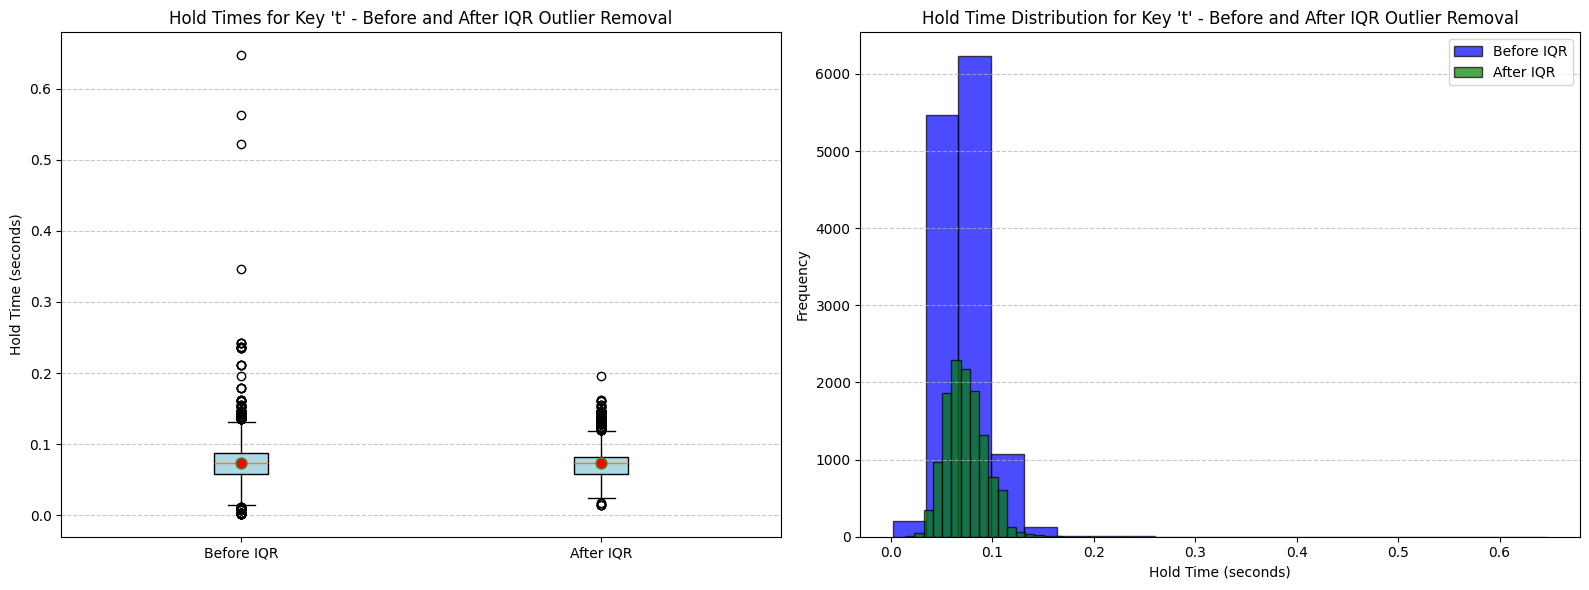

/var/folders/pg/gw2rszz96l3c75cftt4ppm_00000gn/T/ipykernel_7533/3282890543.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


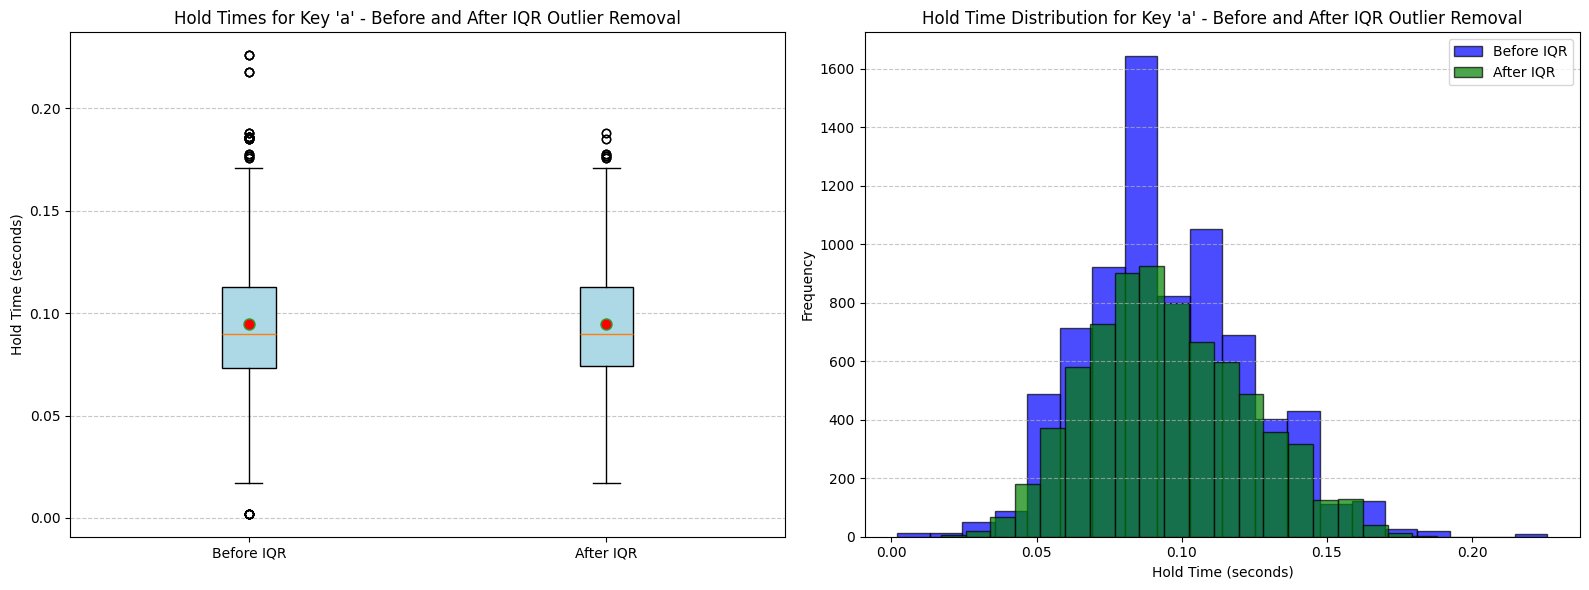

/var/folders/pg/gw2rszz96l3c75cftt4ppm_00000gn/T/ipykernel_7533/3282890543.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


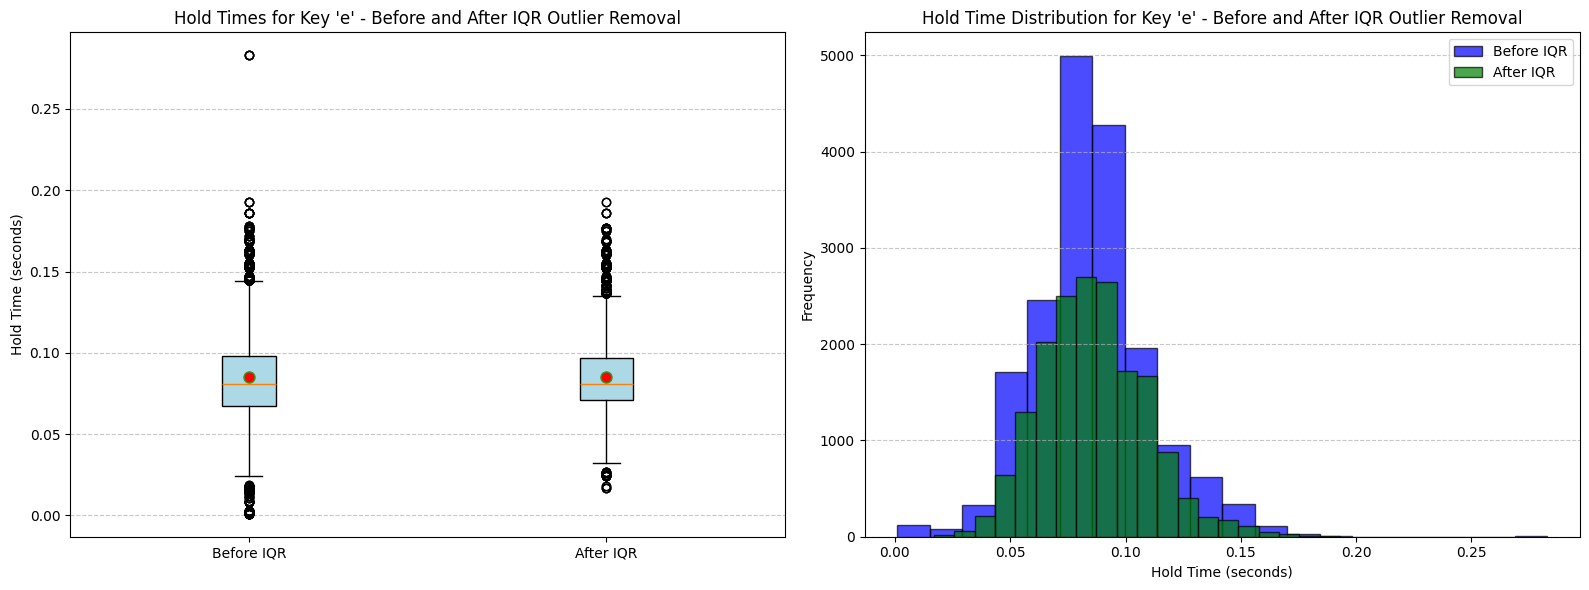

/var/folders/pg/gw2rszz96l3c75cftt4ppm_00000gn/T/ipykernel_7533/3282890543.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


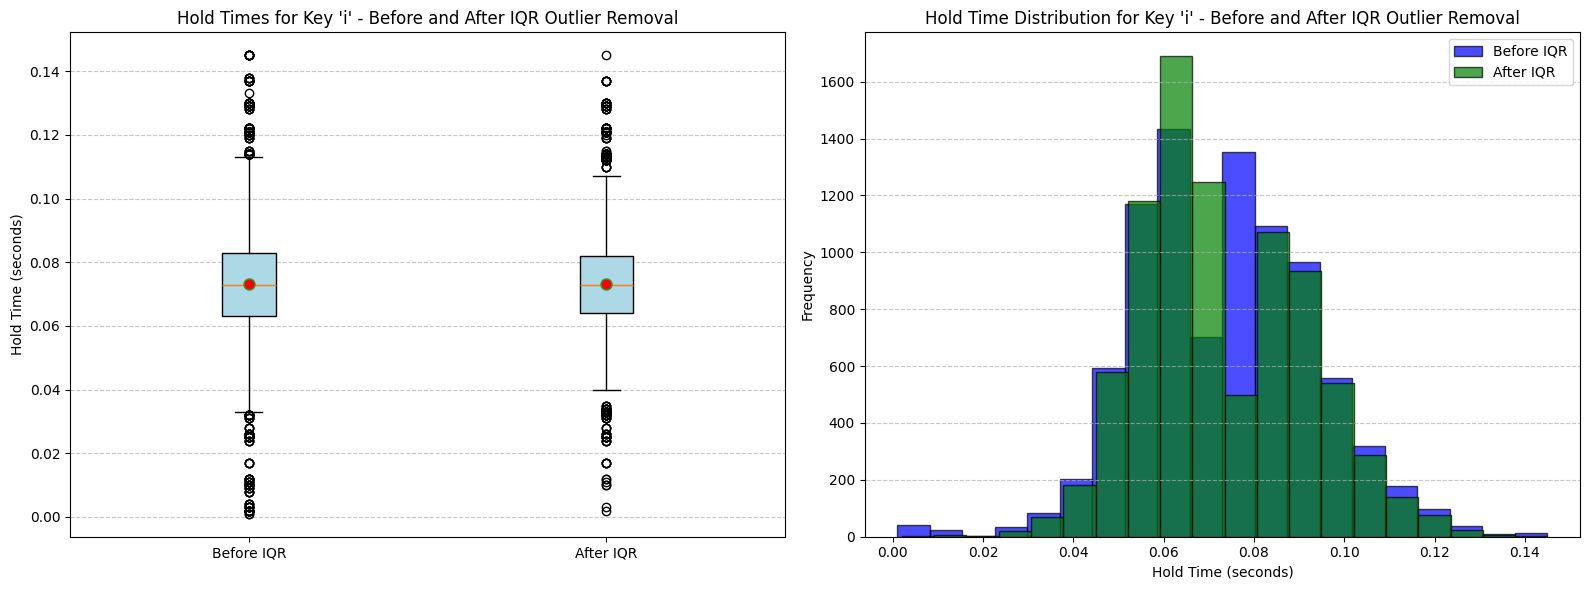

/var/folders/pg/gw2rszz96l3c75cftt4ppm_00000gn/T/ipykernel_7533/3282890543.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


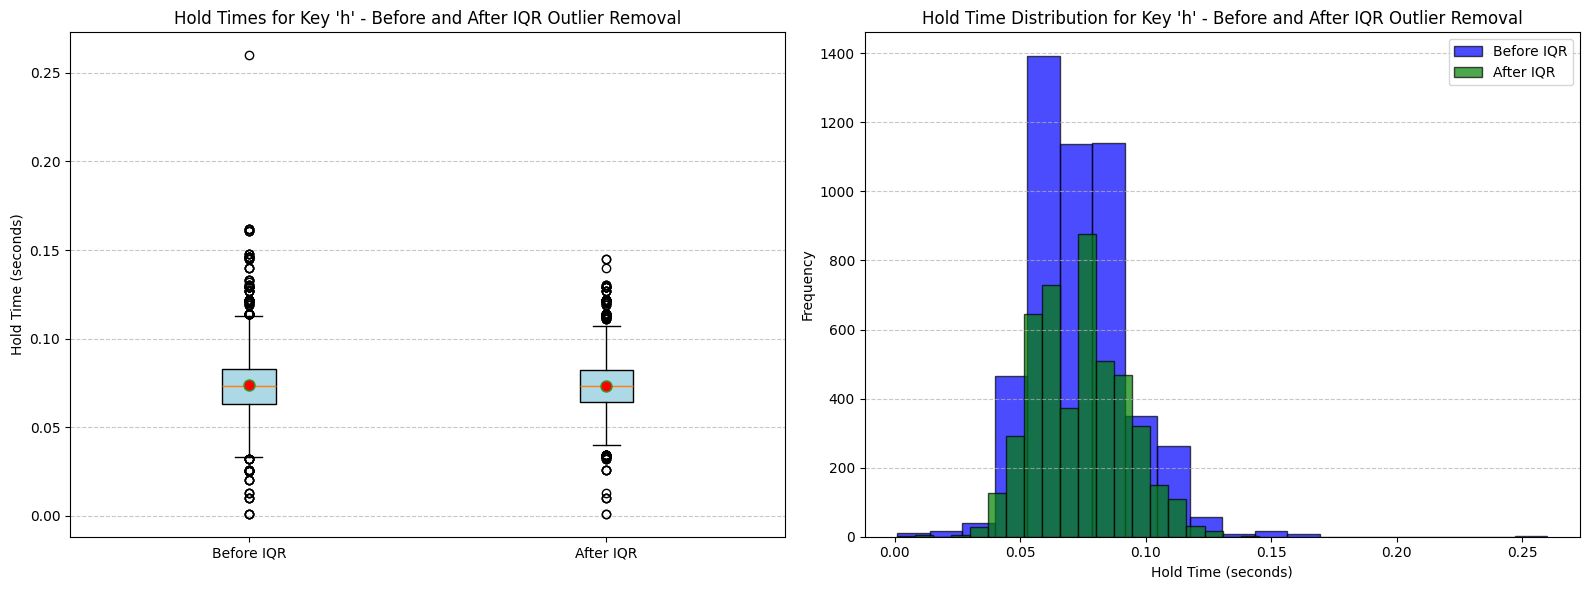

In [30]:
import matplotlib.pyplot as plt

# Visualize hold times before and after outlier removal
for key in keys_of_interest:
    # Collect data for all samples before and after outlier removal
    hold_times_before = []
    hold_times_after = []

    for sample in samples:
        # Calculate hold times for the sample
        hold_times = calculate_hold_times(sample)
        hold_times_before.extend(hold_times[key])

    for cleaned_hold_times in processed_samples:
        hold_times_after.extend(cleaned_hold_times[key])

    # Convert to NumPy arrays for visualization
    hold_times_before = np.array(hold_times_before)
    hold_times_after = np.array(hold_times_after)

    # Create a figure with two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Box plot
    axes[0].boxplot(
        [hold_times_before, hold_times_after], 
        labels=['Before IQR', 'After IQR'], 
        showmeans=True,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue'),
        meanprops=dict(marker='o', markerfacecolor='red', markersize=8),
    )
    axes[0].set_title(f"Hold Times for Key '{key}' - Before and After IQR Outlier Removal")
    axes[0].set_ylabel("Hold Time (seconds)")
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Histogram
    axes[1].hist(hold_times_before, bins=20, alpha=0.7, label='Before IQR', color='blue', edgecolor='black')
    axes[1].hist(hold_times_after, bins=20, alpha=0.7, label='After IQR', color='green', edgecolor='black')
    axes[1].set_title(f"Hold Time Distribution for Key '{key}' - Before and After IQR Outlier Removal")
    axes[1].set_xlabel("Hold Time (seconds)")
    axes[1].set_ylabel("Frequency")
    axes[1].legend()
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

In [31]:
import numpy as np
import pandas as pd

# Initialize lists to store feature vectors and corresponding labels
feature_vectors = []
labels = []

# Keys of interest
keys_of_interest = ['t', 'a', 'e', 'i', 'h']

# Iterate over each processed sample and its corresponding label
for idx, cleaned_hold_times in enumerate(processed_samples):
    features = []
    for key in keys_of_interest:
        times = cleaned_hold_times.get(key, np.array([]))
        if len(times) > 0:
            # Calculate mean and standard deviation
            mean_time = np.mean(times)
            std_time = np.std(times)
        else:
            # Handle missing data by assigning zero
            mean_time = 0.0
            std_time = 0.0
        # Append the features for this key
        features.extend([mean_time, std_time])
    # Append the feature vector and label to the lists
    feature_vectors.append(features)
    labels.append(sample_labels[idx])

# Convert feature vectors and labels to NumPy arrays or pandas DataFrames
feature_vectors = np.array(feature_vectors)
labels = np.array(labels)

# Optionally, create a pandas DataFrame for better visualization
feature_names = []
for key in keys_of_interest:
    feature_names.extend([f'{key}_mean', f'{key}_std'])

features_df = pd.DataFrame(feature_vectors, columns=feature_names)
labels_series = pd.Series(labels, name='userID')


/Users/rashmi/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Class Distribution: {np.int64(0): np.int64(33), np.int64(1): np.int64(33), np.int64(2): np.int64(36), np.int64(3): np.int64(29), np.int64(4): np.int64(36), np.int64(5): np.int64(33), np.int64(6): np.int64(28), np.int64(7): np.int64(40), np.int64(8): np.int64(30), np.int64(9): np.int64(35)}

Fold 1


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 410 (1.60 KB)

 Trainable params: 370 (1.45 KB)

 Non-trainable params: 40 (160.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0896 - loss: 2.5545 - val_accuracy: 0.1171 - val_loss: 2.4450
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1067 - loss: 2.4727 - val_accuracy: 0.1351 - val_loss: 2.4194
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1060 - loss: 2.4361 - val_accuracy: 0.1622 - val_loss: 2.3962
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1259 - loss: 2.3585 - val_accuracy: 0.1712 - val_loss: 2.3737
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1277 - loss: 2.3810 - val_accuracy: 0.1982 - val_loss: 2.3509
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1780 - loss: 2.3127 - val_accuracy: 0.2432 - val_loss: 2.3284
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1893 - loss: 2.2643 - val_accuracy: 0.2613 - val_loss: 2.3063
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1990 - loss: 2.2454 - val_accuracy: 0.2523 - val_loss: 2.2846

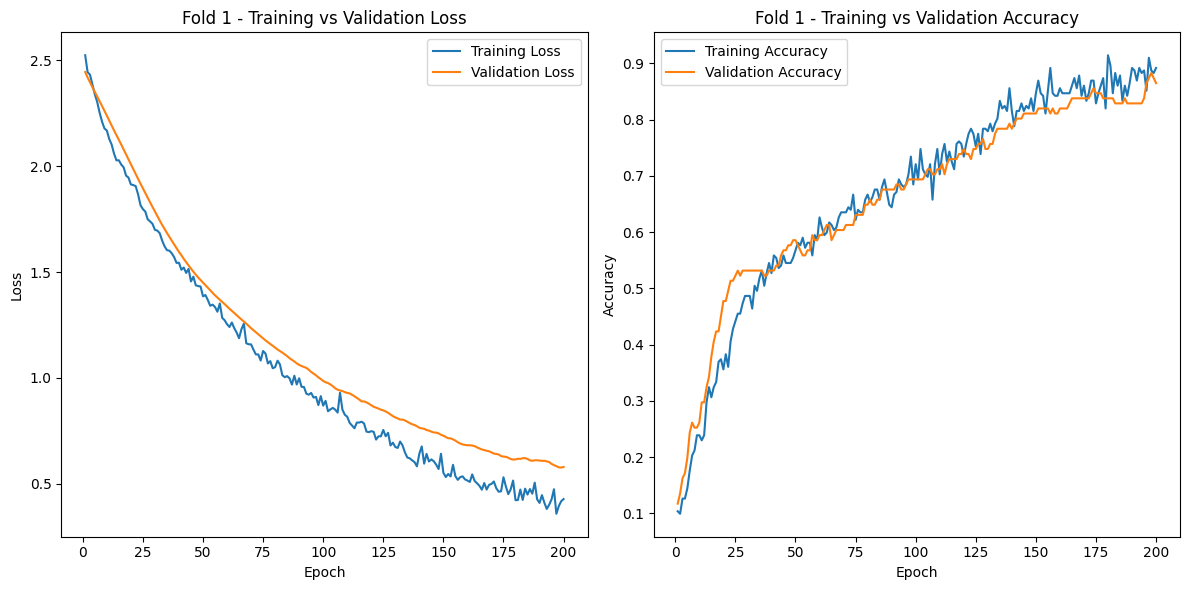


Fold 2


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 410 (1.60 KB)

 Trainable params: 370 (1.45 KB)

 Non-trainable params: 40 (160.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0995 - loss: 2.4759 - val_accuracy: 0.1081 - val_loss: 2.4929
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0870 - loss: 2.4527 - val_accuracy: 0.0991 - val_loss: 2.4595
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1578 - loss: 2.3920 - val_accuracy: 0.1171 - val_loss: 2.4284
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1290 - loss: 2.3161 - val_accuracy: 0.1261 - val_loss: 2.3982
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1410 - loss: 2.2974 - val_accuracy: 0.1261 - val_loss: 2.3676
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1512 - loss: 2.3177 - val_accuracy: 0.1622 - val_loss: 2.3387
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1665 - loss: 2.2700 - val_accuracy: 0.1532 - val_loss: 2.3094
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2113 - loss: 2.2060 - val_accuracy: 0.1622 - val_loss: 2.2828

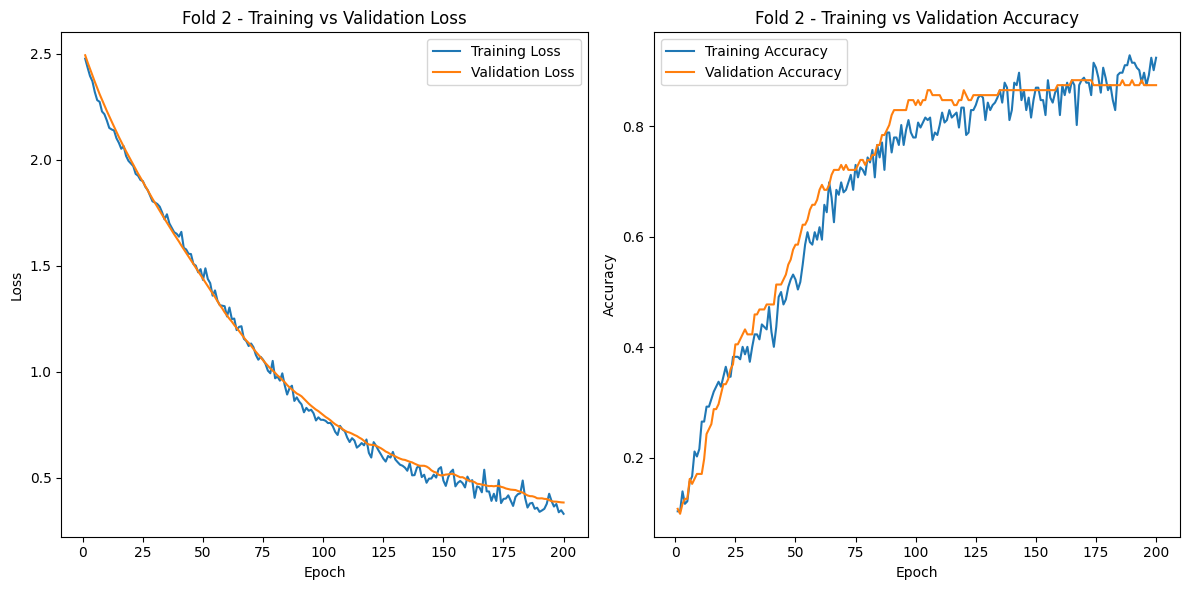


Fold 3


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 410 (1.60 KB)

 Trainable params: 370 (1.45 KB)

 Non-trainable params: 40 (160.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1477 - loss: 2.4104 - val_accuracy: 0.1712 - val_loss: 2.2668
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1894 - loss: 2.3258 - val_accuracy: 0.1982 - val_loss: 2.2375
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1901 - loss: 2.2720 - val_accuracy: 0.2252 - val_loss: 2.2086
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2107 - loss: 2.2271 - val_accuracy: 0.2523 - val_loss: 2.1805
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2328 - loss: 2.1343 - val_accuracy: 0.3063 - val_loss: 2.1540
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2484 - loss: 2.1040 - val_accuracy: 0.3063 - val_loss: 2.1273
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2455 - loss: 2.1017 - val_accuracy: 0.3243 - val_loss: 2.1011
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2276 - loss: 2.0910 - val_accuracy: 0.3243 - val_loss: 2.0758

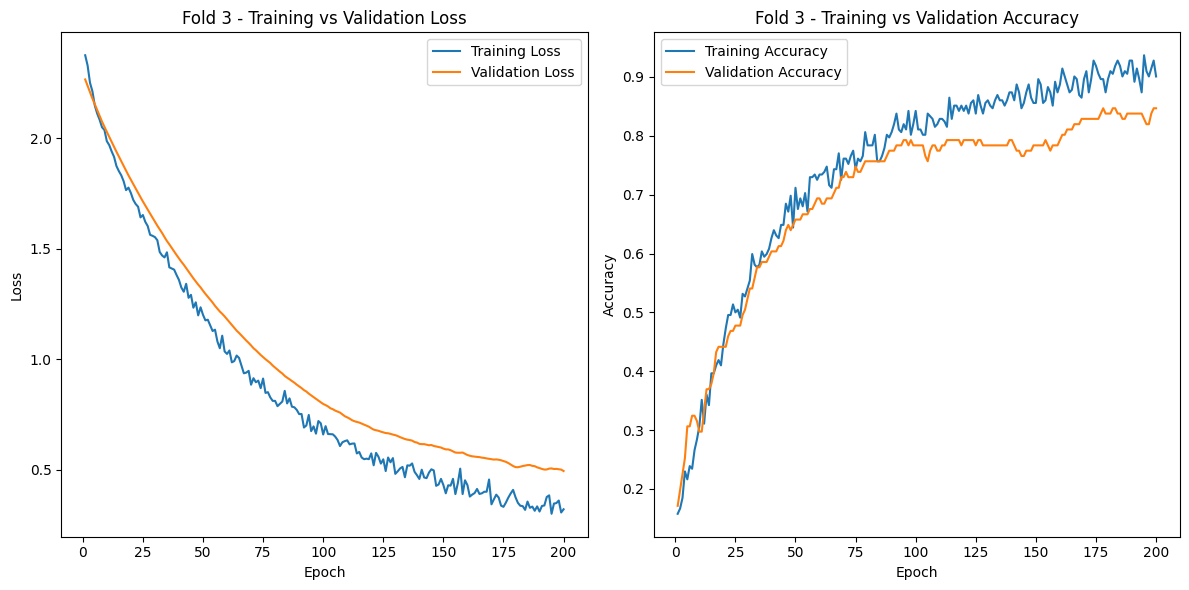


Average Validation Accuracy over 3 folds: 86.49%


In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Data Preparation

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_vectors)

# Encoding labels (user IDs) to integers using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Check class distribution for imbalance
unique, counts = np.unique(y_encoded, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

# Convert integer labels to one-hot encoded vectors
y_one_hot = to_categorical(y_encoded, num_classes=10)

# Step 2: Initialize Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize lists to store test accuracies and histories for each fold
test_accuracies = []
all_histories = []

fold_no = 1
for train_index, val_index in skf.split(X_scaled, y_encoded):
    print(f"\nFold {fold_no}")
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y_one_hot[train_index], y_one_hot[val_index]

    # Step 3: Building the Model
    model = Sequential()
    # First hidden layer with Batch Normalization and L2 Regularization
    model.add(Dense(10, input_dim=X_scaled.shape[1], kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    # Second hidden layer with Batch Normalization and L2 Regularization
    model.add(Dense(10, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    # Output layer
    model.add(Dense(10, activation='softmax'))

    model.summary()

    # Step 4: Compiling the Model
    optimizer = Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Step 5: Define EarlyStopping Callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    )

    # Step 6: Training the Model with Early Stopping
    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=200,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping],
        verbose=1
    )

    # Save the history
    all_histories.append(history)

    # Step 7: Evaluating the Model
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Validation Accuracy for Fold {fold_no}: {accuracy * 100:.2f}%")

    # Append the accuracy to the list
    test_accuracies.append(accuracy)

    # Plot training & validation accuracy and loss values
    epochs_range = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold_no} - Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} - Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    fold_no += 1

# Step 8: Reporting Results
# Calculate the average accuracy across all folds
average_accuracy = np.mean(test_accuracies)
print(f'\nAverage Validation Accuracy over {skf.get_n_splits()} folds: {average_accuracy * 100:.2f}%')


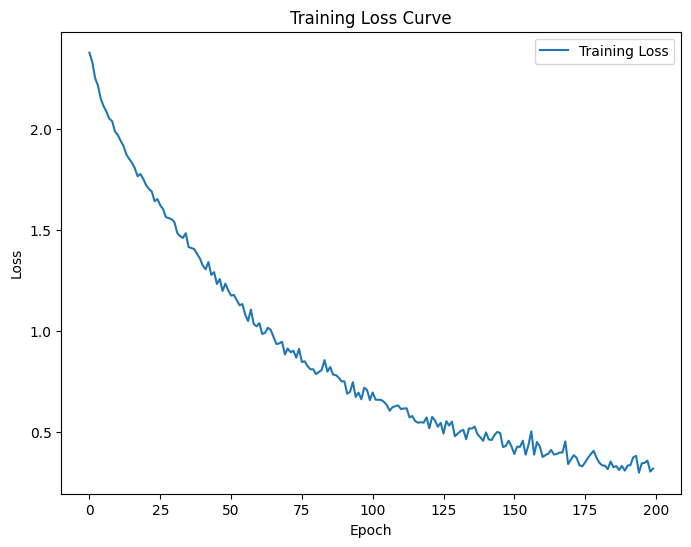

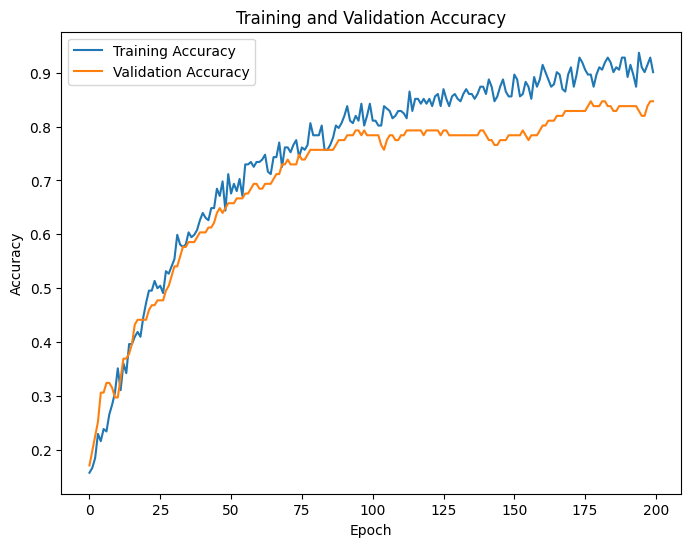

In [33]:
import matplotlib.pyplot as plt

# Plot the training loss curve w.r.t epoch
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy w.r.t epoch
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


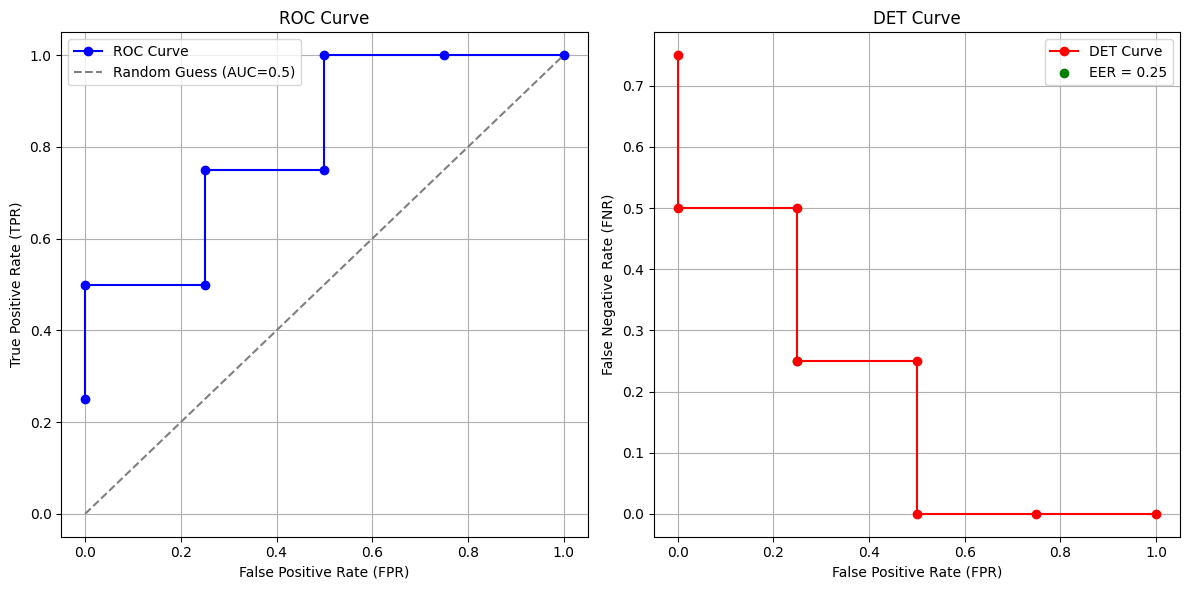

EER: 0.25


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the table
fpr = [0, 0, 0.25, 0.25, 0.50, 0.50, 0.75, 1.00]
tpr = [0.25, 0.50, 0.50, 0.75, 0.75, 1.00, 1.00, 1.00]
fnr = [1 - x for x in tpr]  # FNR = 1 - TPR

# Convert FPR and FNR to numpy arrays for interpolation
fpr_array = np.array(fpr)
fnr_array = np.array(fnr)

# Calculate the EER (point where FPR = FNR)
eer_index = np.argmin(np.abs(fpr_array - fnr_array))  # Find closest index
eer = (fpr_array[eer_index] + fnr_array[eer_index]) / 2  # Average for precision

# Plotting the ROC curve
plt.figure(figsize=(12, 6))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, marker='o', linestyle='-', color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC=0.5)')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid()

# Subplot 2: DET Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, fnr, marker='o', linestyle='-', color='r', label='DET Curve')
plt.scatter([fpr_array[eer_index]], [fnr_array[eer_index]], color='g', label=f"EER = {eer:.2f}")
plt.title("DET Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("False Negative Rate (FNR)")
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

# Print EER
print(f"EER: {eer:.2f}")
